In [1]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import re
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier


# Exploratory Data Analysis

In [2]:
df1=pd.read_csv("Insurance_train.csv")

In [3]:
df_EDA=df1.copy()

df_EDA.shape

(58592, 44)

In [4]:
df_EDA.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
df_EDA.columns


Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [6]:
df_EDA.dropna(inplace = True)
df_EDA.drop_duplicates(inplace = True)

In [7]:
df_EDA.shape

(58592, 44)

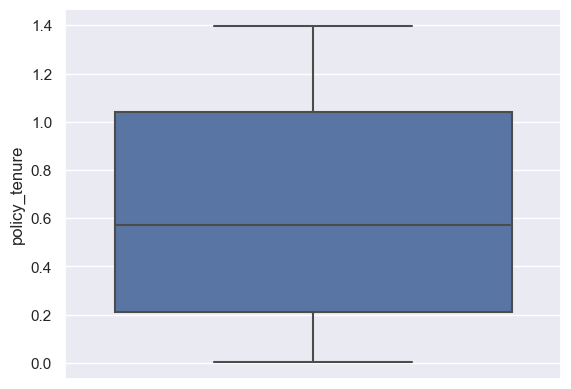

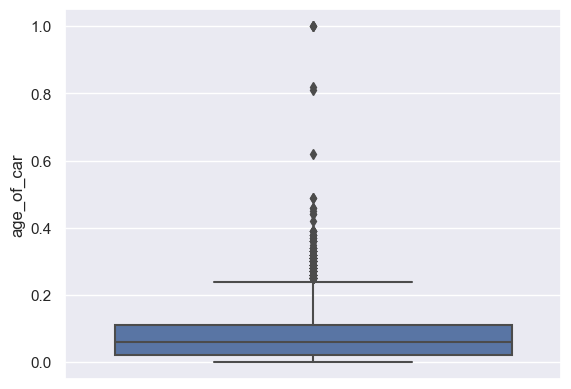

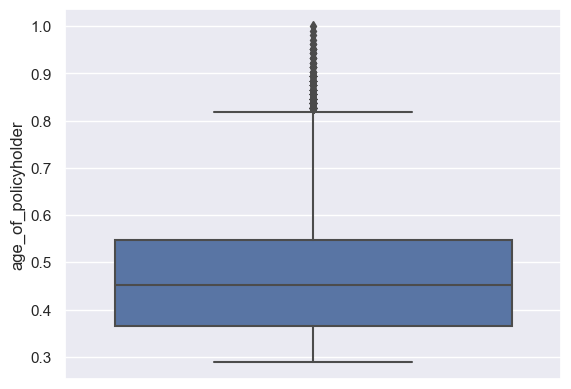

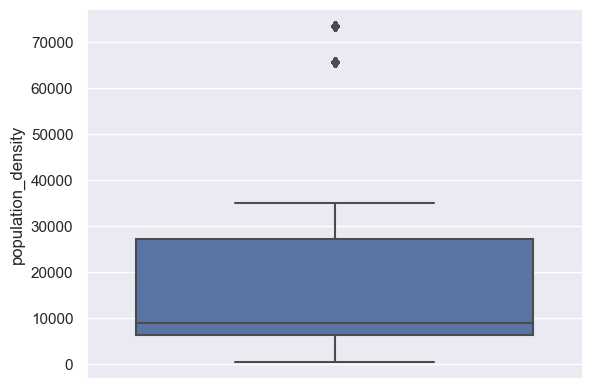

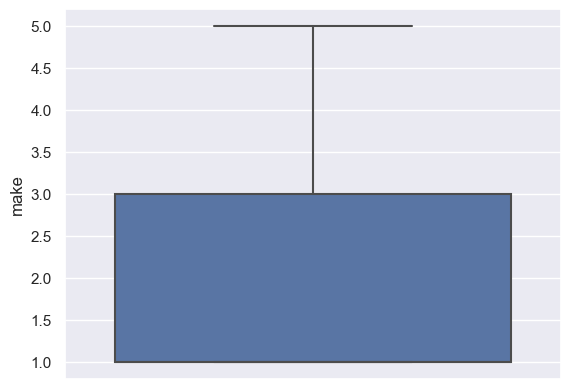

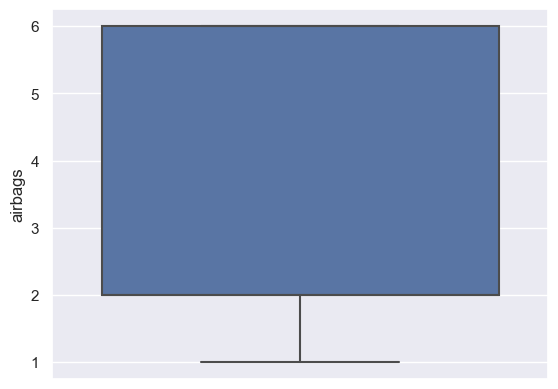

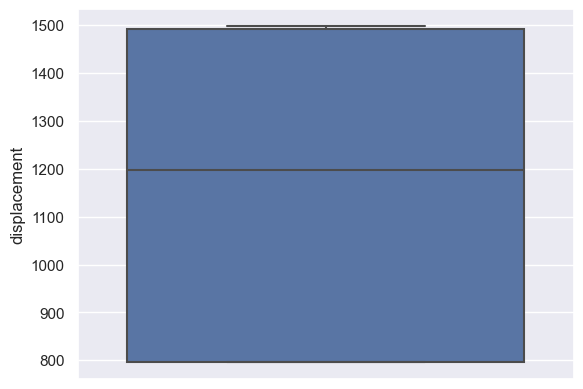

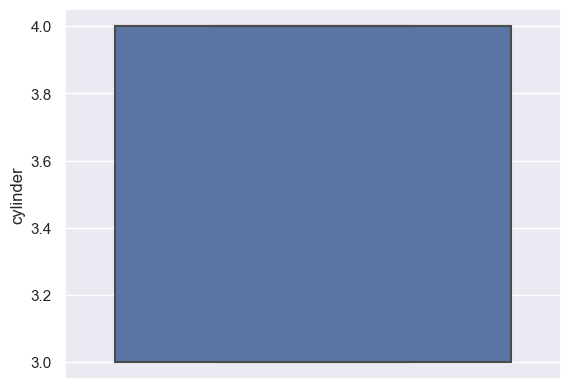

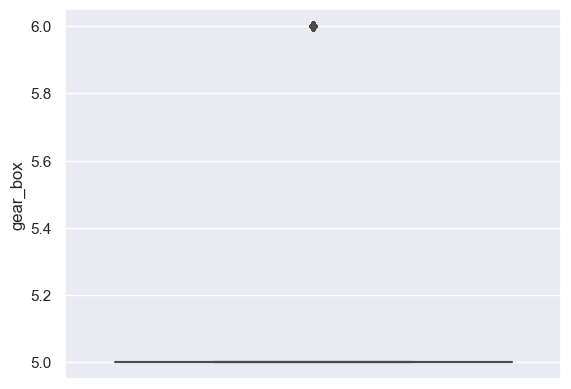

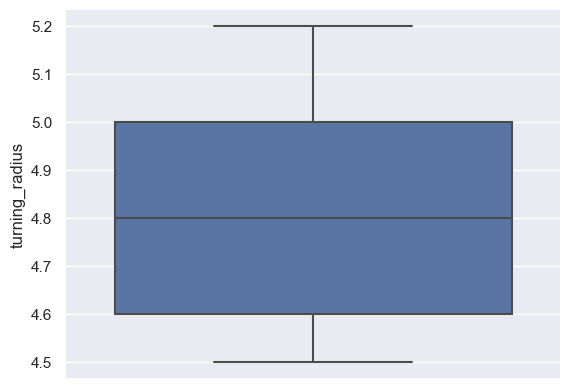

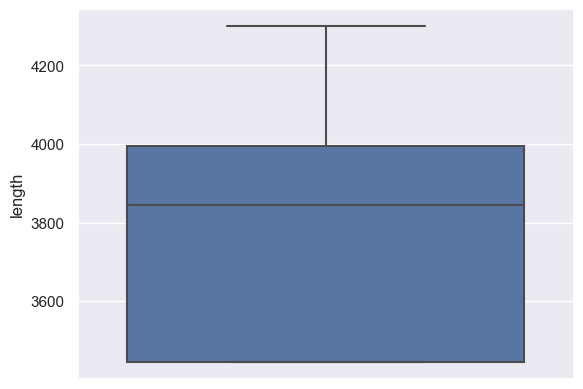

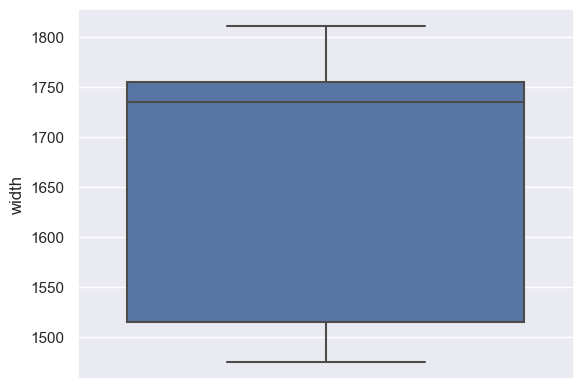

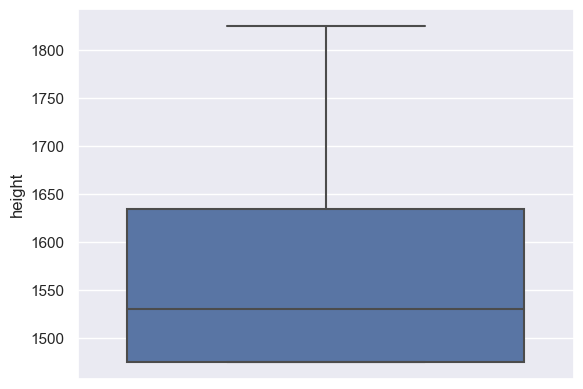

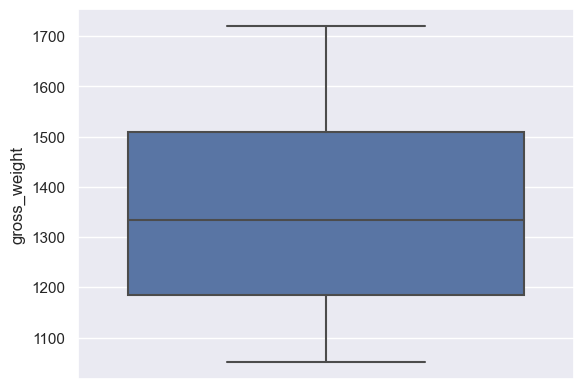

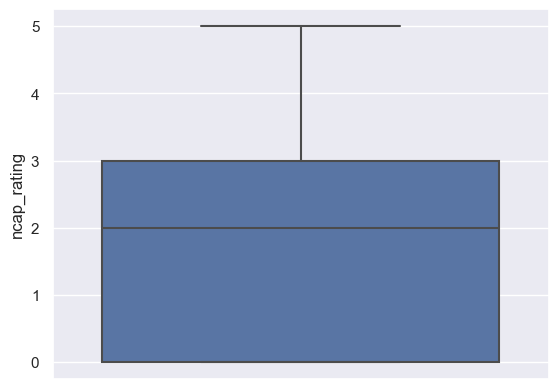

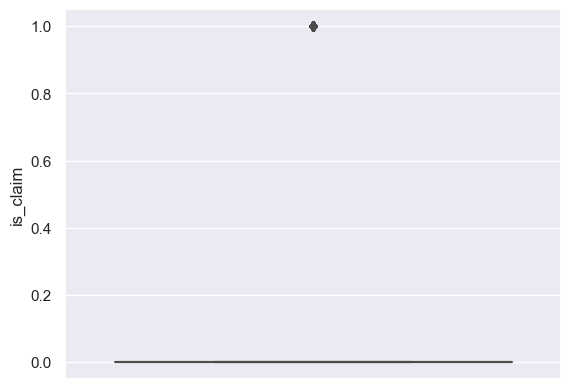

In [8]:
def boxplot(cols):
    sns.boxplot(y=df_EDA[cols])
    plt.show()
numeric_cols = df_EDA.select_dtypes(include=['int64', 'float64']).columns
for i in list(numeric_cols):
    boxplot(i)

In [9]:
# lower fence and upper fence 
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
pos_outlier=Q3+1.5*IQR
neg_outlier=Q1-1.5*IQR
print("Upper fence \n\n",pos_outlier)
print("-------------------------------------")
print("Lower fence \n\n",neg_outlier)

Upper fence 

 policy_tenure              2.282386
age_of_car                 0.245000
age_of_policyholder        0.822115
population_density     58339.500000
make                       6.000000
airbags                   12.000000
displacement            2538.500000
cylinder                   5.500000
gear_box                   5.000000
turning_radius             5.600000
length                  4820.000000
width                   2115.000000
height                  1875.000000
gross_weight            1997.500000
ncap_rating                7.500000
is_claim                   0.000000
dtype: float64
-------------------------------------
Lower fence 

 policy_tenure             -1.033032
age_of_car                -0.115000
age_of_policyholder        0.091346
population_density    -25224.500000
make                      -2.000000
airbags                   -4.000000
displacement            -249.500000
cylinder                   1.500000
gear_box                   5.000000
turning_radius   

In [10]:
df_EDA["age_of_car"]=np.where(df_EDA["age_of_car"]<=-0.115000,-0.115000,np.where(df_EDA["age_of_car"]>=0.245000,0.245000,df_EDA["age_of_car"]))

df_EDA["age_of_policyholder"]=np.where(df_EDA["age_of_policyholder"]<=0.091346, 0.091346,np.where(df_EDA["age_of_policyholder"]>=0.822115,0.822115,df_EDA["age_of_policyholder"]))

df_EDA["population_density"]=np.where(df_EDA["population_density"]<=-25224.500000,-25224.500000,np.where(df_EDA["population_density"]>=58339.500000,58339.500000,df_EDA["population_density"]))

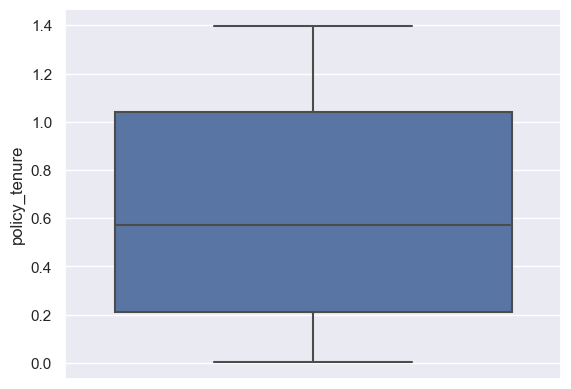

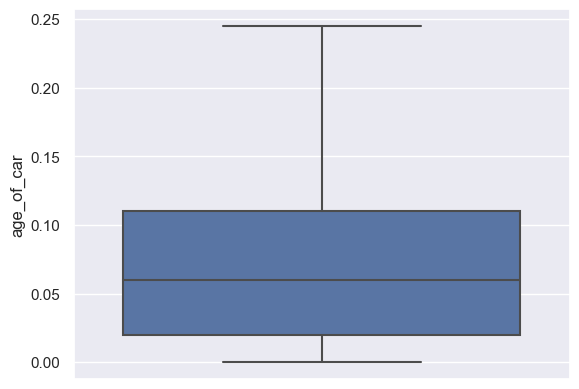

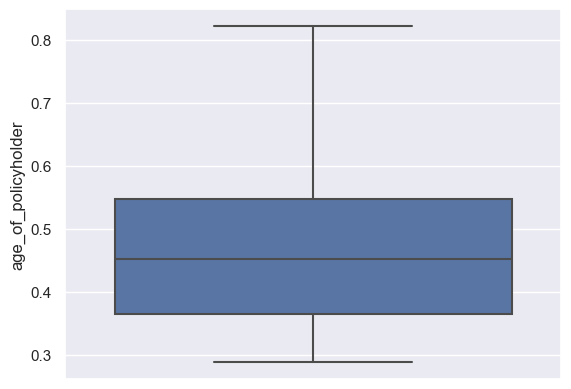

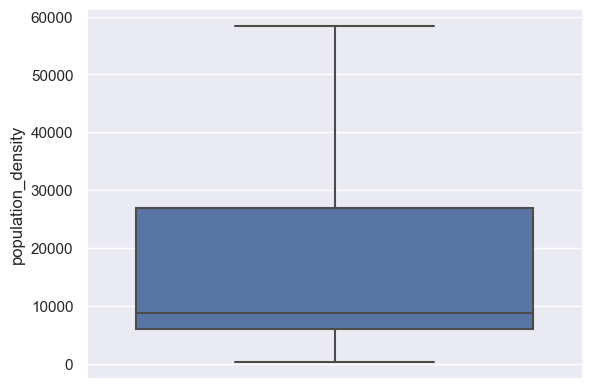

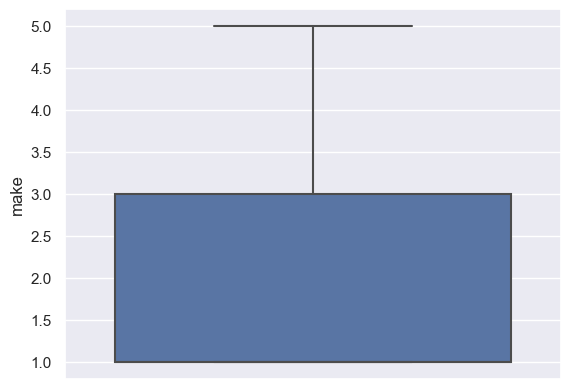

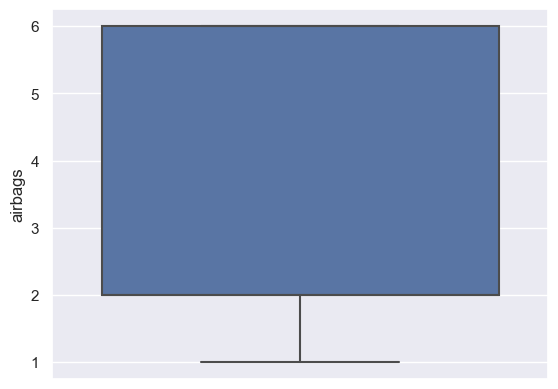

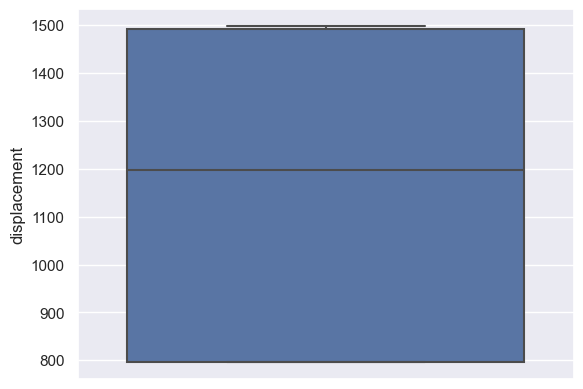

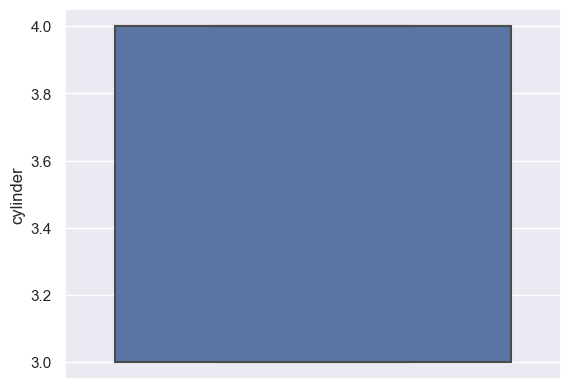

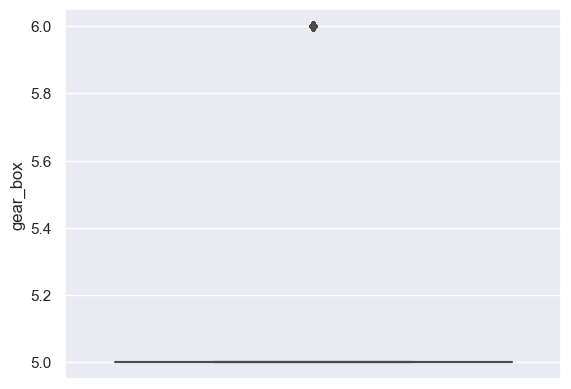

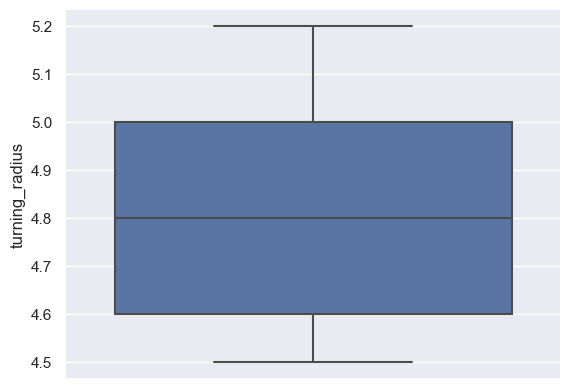

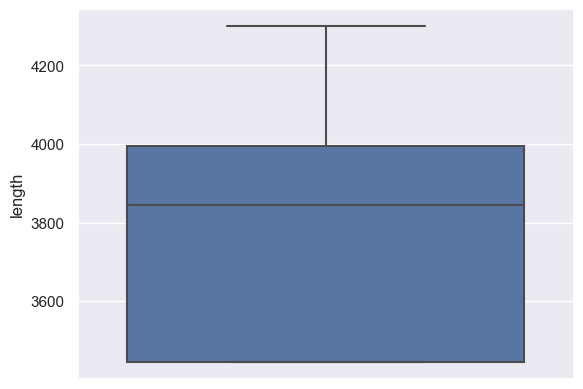

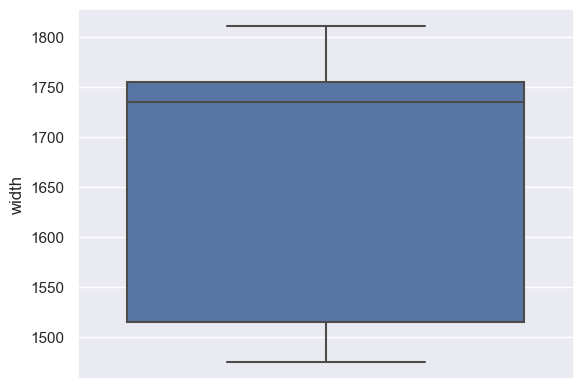

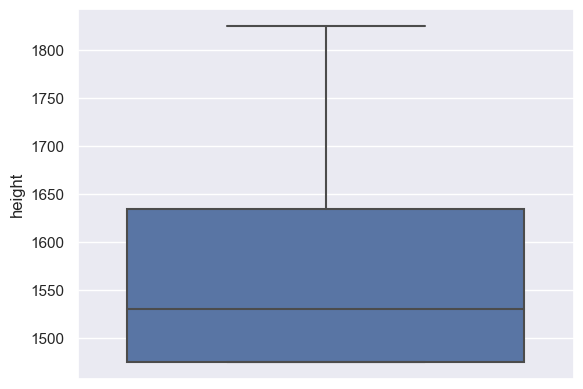

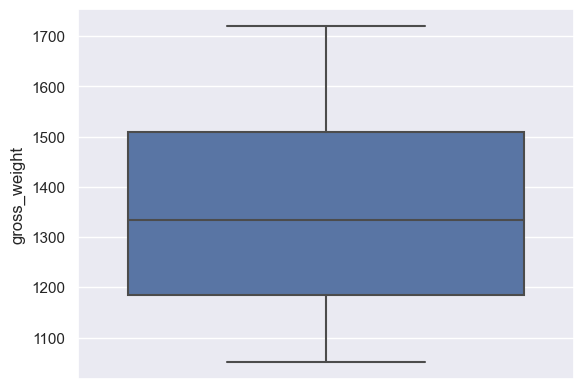

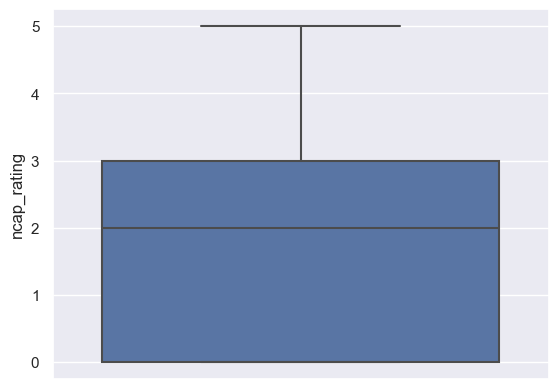

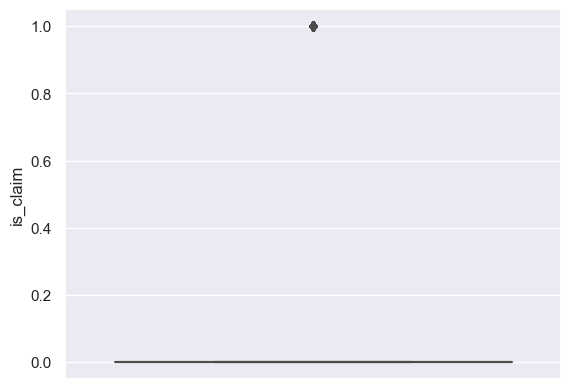

In [11]:
def boxplot(cols):
    sns.boxplot(y=df_EDA[cols])
    plt.show()
numeric_cols = df_EDA.select_dtypes(include=['int64', 'float64']).columns
for i in list(numeric_cols):
    boxplot(i)

In [12]:
# Define the age range thresholds in years
young_age = 30
middle_age = 50
max_age = 100

# Create a new column for age in years
df_EDA['age_of_policyholder_years'] = df_EDA['age_of_policyholder'] * 100  # Assuming the fraction is in percent

# Create a new column for the age group
df_EDA['age_group'] = pd.cut(df_EDA['age_of_policyholder_years'], bins=[0, young_age, middle_age, max_age],
                           labels=['young', 'middle-aged', 'senior'], right=False)



In [13]:
# Define the thresholds for car age categories
new_car_threshold = 0.05  # Fraction value below which a car is considered new
used_car_threshold = 0.1  # Fraction value above which a car is considered used
old_car_threshold = 0.2  # Fraction value above which a car is considered old
very_old_car_threshold = 0.245  # Fraction value above which a car is considered very old

# Create a new column 'is_new_car'
df_EDA['is_new_car'] = df_EDA['age_of_car'].apply(lambda x: 'Yes' if x < new_car_threshold else 'No')

# Create a new column 'car_age_group'
df_EDA['car_age_group'] = pd.cut(df_EDA['age_of_car'], bins=[0, new_car_threshold, used_car_threshold, old_car_threshold, very_old_car_threshold, 1],
                               labels=['New', 'Used', 'Old', 'Very Old', 'Ancient'], right=False)

# Print the updated dataframe
#print(df_EDA)


In [14]:
# Calculate remaining duration in days
df_EDA['policy_duration_months'] = (df_EDA['policy_tenure'] *12).astype(int)



In [15]:
# Extract numerical values from 'max_power' column
df_EDA['max_power_numeric'] = df_EDA['max_power'].str.extract('(\d+.\d+)').astype(float)

# Extract numerical values from 'max_torque' column
df_EDA['max_torque_numeric'] = df_EDA['max_torque'].str.extract('(\d+.\d+)').astype(float)

# Calculate power-to-weight ratio
df_EDA['power_to_weight_ratio'] = df_EDA['max_power_numeric'] / df_EDA['gross_weight']

# Calculate torque-to-displacement ratio
df_EDA['torque_to_displacement_ratio'] = df_EDA['max_torque_numeric'] / df_EDA['displacement']

# Create engine category based on horsepower ranges
df_EDA['engine_category'] = pd.cut(df_EDA['max_power_numeric'], bins=[0, 100, 200, 300, np.inf],
                                   labels=['Low', 'Medium', 'High', 'Very High'])

# Print the updated dataframe
print(df_EDA.head())


  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ...  \
0              4990.0     1       A    M1       CNG  ...   
1             27003.0     1       A    M1       CNG  ...   
2              4076.0     1       A    M1       CNG  ...   
3             21622.0     1      C1    M2    Petrol  ...   
4             34738.0     2       A    M3    Petrol  ...   

  age_of_policyholder_years    age_group is_new_car  car_age_group  \
0                 64.423077       senior         No           Used   
1                 37.500000  middle-aged  

In [16]:
# Calculate aspect ratio
df_EDA['aspect_ratio'] = (df_EDA['length'] / df_EDA['width']).round(2)

# Calculate volume
df_EDA['volume'] = df_EDA['length'] * df_EDA['width'] * df_EDA['height']

# Calculate density
df_EDA['density'] = (df_EDA['gross_weight'] / df_EDA['volume'])


In [17]:
label=preprocessing.LabelEncoder()
df_EDA["is_esc"]=label.fit_transform(df_EDA["is_esc"])
df_EDA["is_brake_assist"]=label.fit_transform(df_EDA["is_brake_assist"])
df_EDA["is_tpms"]=label.fit_transform(df_EDA["is_tpms"])
df_EDA["is_parking_sensors"]=label.fit_transform(df_EDA["is_parking_sensors"])
df_EDA["is_parking_camera"]=label.fit_transform(df_EDA["is_parking_camera"])
df_EDA["is_front_fog_lights"]=label.fit_transform(df_EDA["is_front_fog_lights"])
df_EDA["is_rear_window_wiper"]=label.fit_transform(df_EDA["is_rear_window_wiper"])
df_EDA["is_rear_window_defogger"]=label.fit_transform(df_EDA["is_rear_window_defogger"])
df_EDA["is_central_locking"]=label.fit_transform(df_EDA["is_central_locking"])
df_EDA["is_power_steering"]=label.fit_transform(df_EDA["is_power_steering"])
df_EDA["is_driver_seat_height_adjustable"]=label.fit_transform(df_EDA["is_driver_seat_height_adjustable"])
df_EDA["is_day_night_rear_view_mirror"]=label.fit_transform(df_EDA["is_day_night_rear_view_mirror"])
df_EDA["is_ecw"]=label.fit_transform(df_EDA["is_ecw"])
df_EDA["is_speed_alert"]=label.fit_transform(df_EDA["is_speed_alert"])

In [18]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 58591
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   policy_id                         58592 non-null  object  
 1   policy_tenure                     58592 non-null  float64 
 2   age_of_car                        58592 non-null  float64 
 3   age_of_policyholder               58592 non-null  float64 
 4   area_cluster                      58592 non-null  object  
 5   population_density                58592 non-null  float64 
 6   make                              58592 non-null  int64   
 7   segment                           58592 non-null  object  
 8   model                             58592 non-null  object  
 9   fuel_type                         58592 non-null  object  
 10  max_torque                        58592 non-null  object  
 11  max_power                         58592 non-null  obje

In [19]:
# List of safety features
safety_features = ['airbags', 'is_esc', 'is_brake_assist', 'is_tpms',
                   'is_parking_sensors', 'is_parking_camera',
                   'is_front_fog_lights', 'is_rear_window_wiper',
                   'is_rear_window_washer', 'is_rear_window_defogger',
                   'is_brake_assist', 'is_power_door_locks',
                   'is_central_locking', 'is_power_steering',
                   'is_driver_seat_height_adjustable',
                   'is_day_night_rear_view_mirror', 'is_ecw',
                   'is_speed_alert']

# Categorize safety features
active_safety_features = ['is_esc', 'is_brake_assist', 'is_tpms',
                          'is_parking_sensors', 'is_parking_camera',
                          'is_front_fog_lights']

passive_safety_features = ['airbags', 'is_rear_window_wiper',
                           'is_rear_window_washer', 'is_rear_window_defogger',
                           'is_power_door_locks', 'is_central_locking',
                           'is_power_steering', 'is_driver_seat_height_adjustable',
                           'is_day_night_rear_view_mirror', 'is_ecw',
                           'is_speed_alert','ncap_rating']

# Create new columns for active and passive safety features
df_EDA['is_active_safety'] = df_EDA[active_safety_features].sum(axis=1)
df_EDA['is_passive_safety'] = df_EDA[passive_safety_features].sum(axis=1)
df_EDA['is_safety']=df_EDA[safety_features].sum(axis=1)

Text(0.5, 1.0, 'Count of Car Insurance Claims')

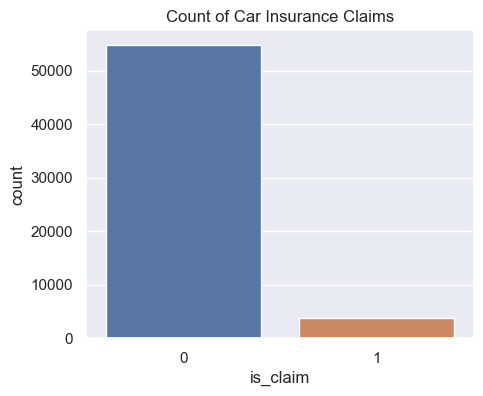

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x='is_claim', data=df_EDA)
plt.title('Count of Car Insurance Claims')

Text(0.5, 1.0, 'Policy Duration by Age Group with Claim Status')

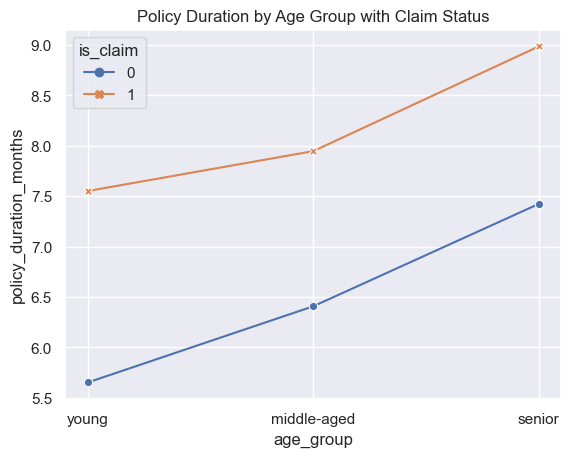

In [21]:

sns.lineplot('age_group','policy_duration_months', hue='is_claim',data=df_EDA,ci=None,markers=True, style='is_claim',dashes=False)
plt.title('Policy Duration by Age Group with Claim Status')

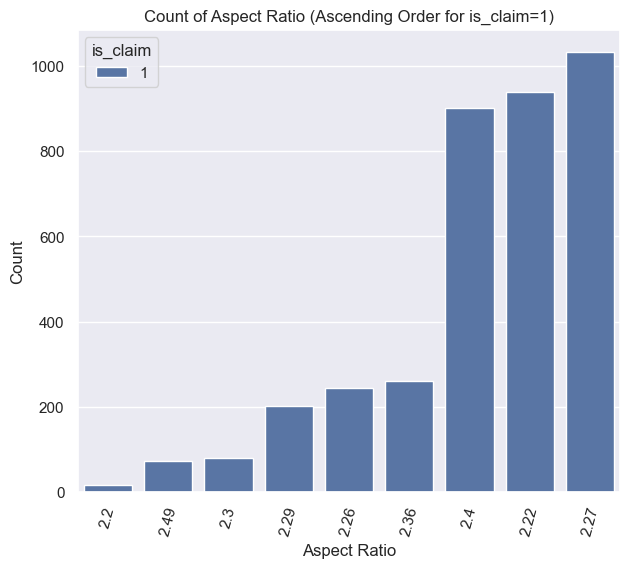

In [22]:

plt.figure(figsize=(7,6))
# Create the count plot with ascending order for aspect_ratio when is_claim=1
sns.countplot(x='aspect_ratio', hue='is_claim', data=df_EDA[df_EDA['is_claim'] == 1],
              order=df_EDA[df_EDA['is_claim'] == 1]['aspect_ratio'].value_counts().sort_values().index)

# Add labels and title
plt.xlabel('Aspect Ratio')
plt.ylabel('Count')
plt.title('Count of Aspect Ratio (Ascending Order for is_claim=1)')
plt.xticks(rotation=75)
# Show the plot
plt.show()


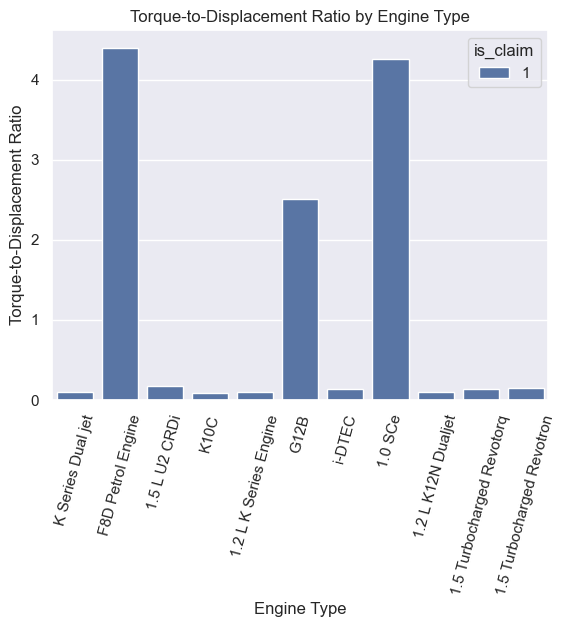

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='engine_type', y='torque_to_displacement_ratio',hue='is_claim', data=df_EDA[df_EDA['is_claim'] == 1])
plt.xlabel('Engine Type')
plt.ylabel('Torque-to-Displacement Ratio')
plt.title('Torque-to-Displacement Ratio by Engine Type')
plt.xticks(rotation=75)
plt.show()


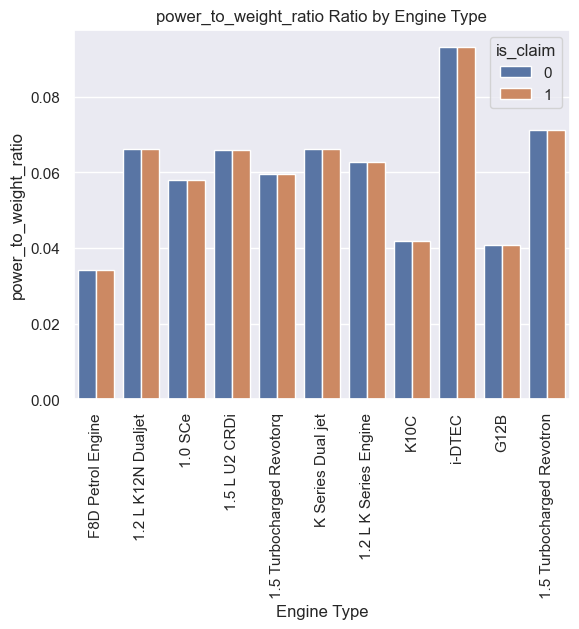

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='engine_type', y='power_to_weight_ratio', data=df_EDA, hue='is_claim')
plt.xlabel('Engine Type')
plt.ylabel('power_to_weight_ratio')
plt.title('power_to_weight_ratio Ratio by Engine Type')
plt.xticks(rotation=90)
plt.show()


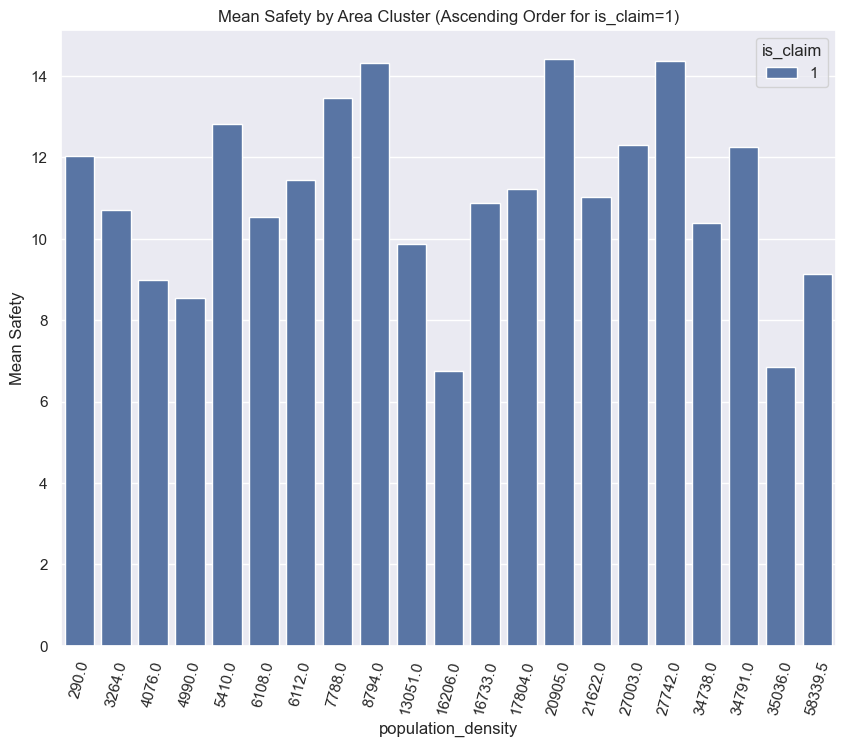

In [25]:
plt.figure(figsize=(10,8))
# Create the bar plot with ascending order for is_claim=1
sns.barplot(x='population_density', y='is_safety', hue='is_claim', data=df_EDA[df_EDA['is_claim'] == 1], ci=None,
order=df_EDA[df_EDA['is_claim'] == 1].groupby('population_density')['is_safety'].mean().sort_index().index)
# Add labels and title
plt.xlabel('population_density')
plt.ylabel('Mean Safety')
plt.title('Mean Safety by Area Cluster (Ascending Order for is_claim=1)')
plt.xticks(rotation=75)
# Show the plot
plt.show()

Text(0.5, 1.0, 'Count of Claims by Age Group')

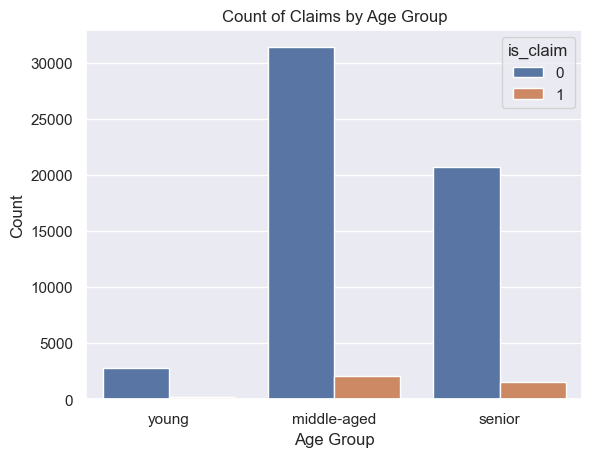

In [26]:
sns.countplot(x='age_group', hue='is_claim', data=df_EDA)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Claims by Age Group')


Text(0.5, 1.0, 'Count of Claims by Car Age Group')

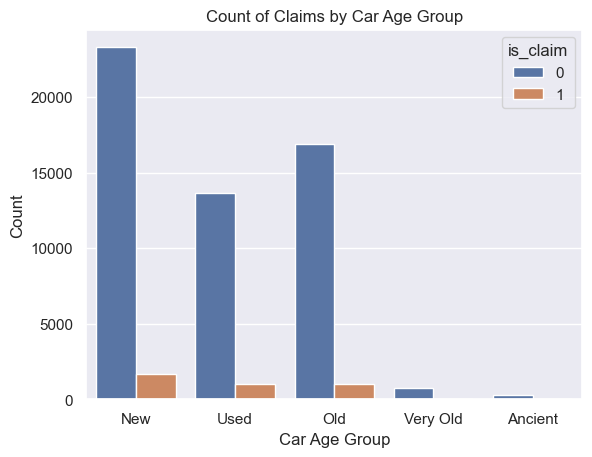

In [27]:
sns.countplot(x='car_age_group', hue='is_claim', data=df_EDA)
plt.xlabel('Car Age Group')
plt.ylabel('Count')
plt.title('Count of Claims by Car Age Group')

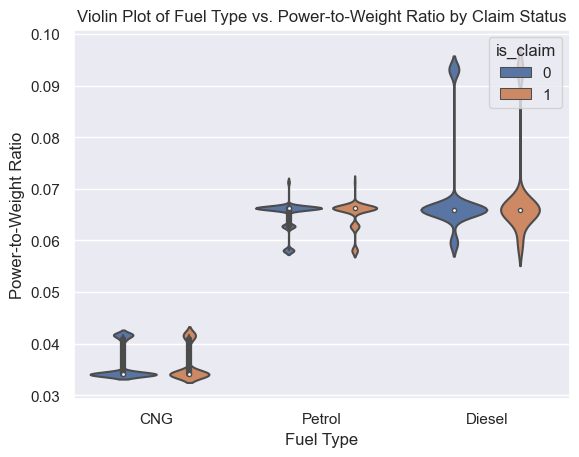

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='fuel_type', y='power_to_weight_ratio', hue='is_claim', data=df_EDA)
plt.xlabel('Fuel Type')
plt.ylabel('Power-to-Weight Ratio')
plt.title('Violin Plot of Fuel Type vs. Power-to-Weight Ratio by Claim Status')
plt.show()


<AxesSubplot:xlabel='is_safety', ylabel='count'>

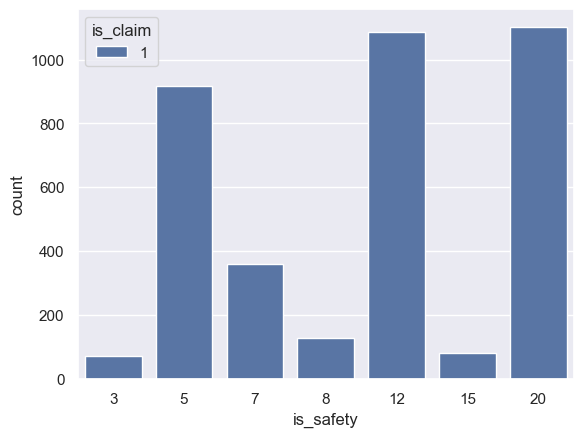

In [29]:
sns.countplot(x='is_safety', data=df_EDA[df_EDA['is_claim'] == 1], hue='is_claim')

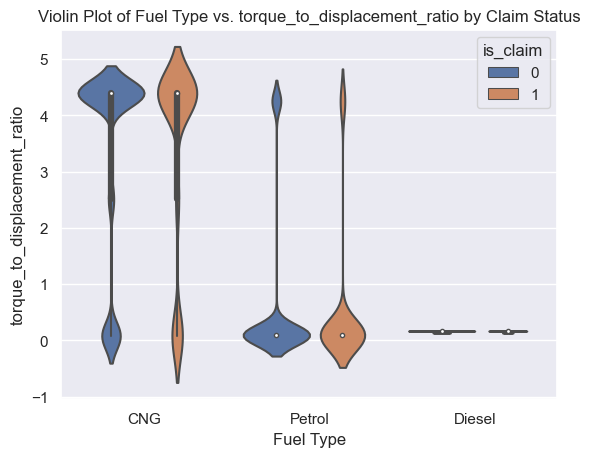

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='fuel_type', y='torque_to_displacement_ratio', hue='is_claim', data=df_EDA)
plt.xlabel('Fuel Type')
plt.ylabel('torque_to_displacement_ratio')
plt.title('Violin Plot of Fuel Type vs. torque_to_displacement_ratio by Claim Status')
plt.show()

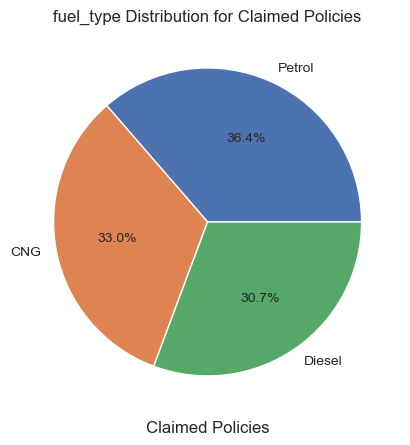

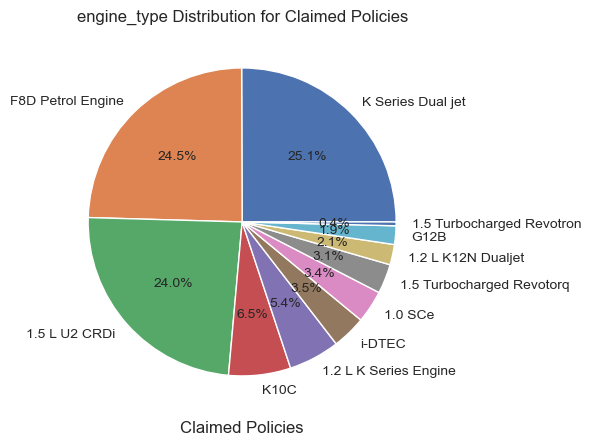

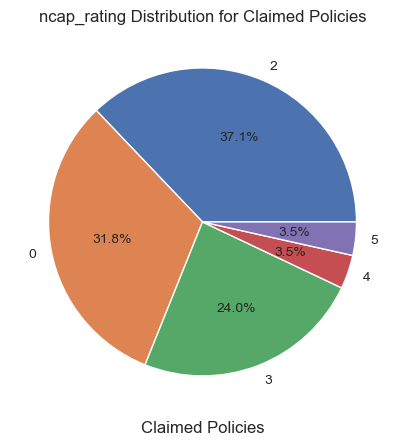

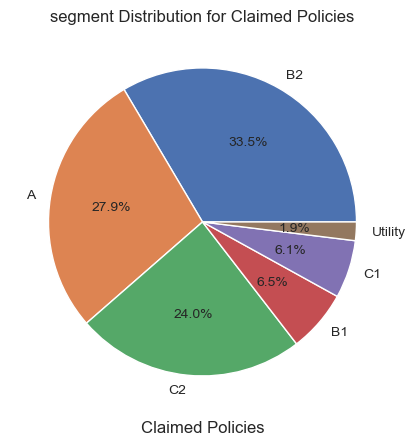

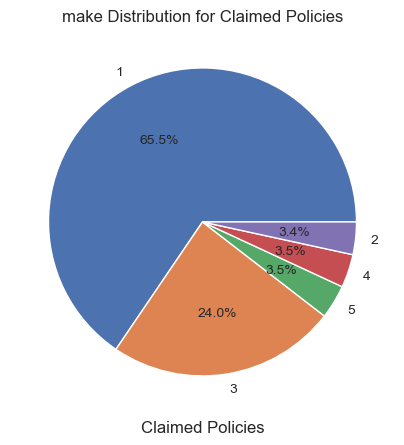

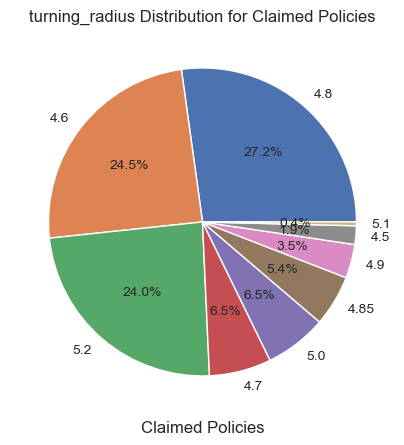

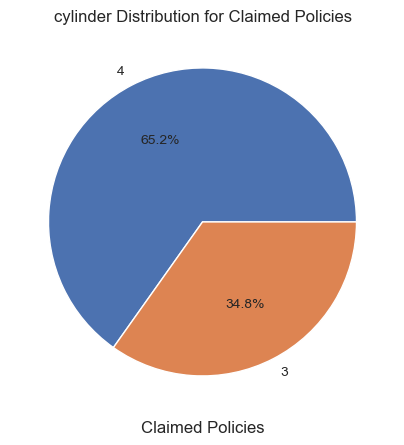

In [31]:
# Select variables to analyze
variables = ['fuel_type', 'engine_type', 'ncap_rating', 'segment', 'make','turning_radius','cylinder']

# Create a pie chart for each variable
for variable in variables:
    plt.figure(figsize=(5, 5))
    
    # Count the frequency of each category
    category_counts = df_EDA[df_EDA['is_claim'] == 1][variable].value_counts()
    
    # Plot the pie chart
    plt.pie(category_counts, labels=category_counts.index, autopct="%0.1f%%",textprops={'fontsize': 10})

# Set the title and axis labels)

    # Set the title and axis labels
    plt.title(f'{variable} Distribution for Claimed Policies')
    plt.xlabel('Claimed Policies')
    plt.ylabel('')
    


    # Display the pie chart
    plt.show()

In [32]:
df_EDA.columns


Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'age_of_policyholder_years', 'age_group', 'is_new_car', 'car_age_group',
       'policy_duration_months', 'max_power_numeric', 'max_torque_numeric',
  

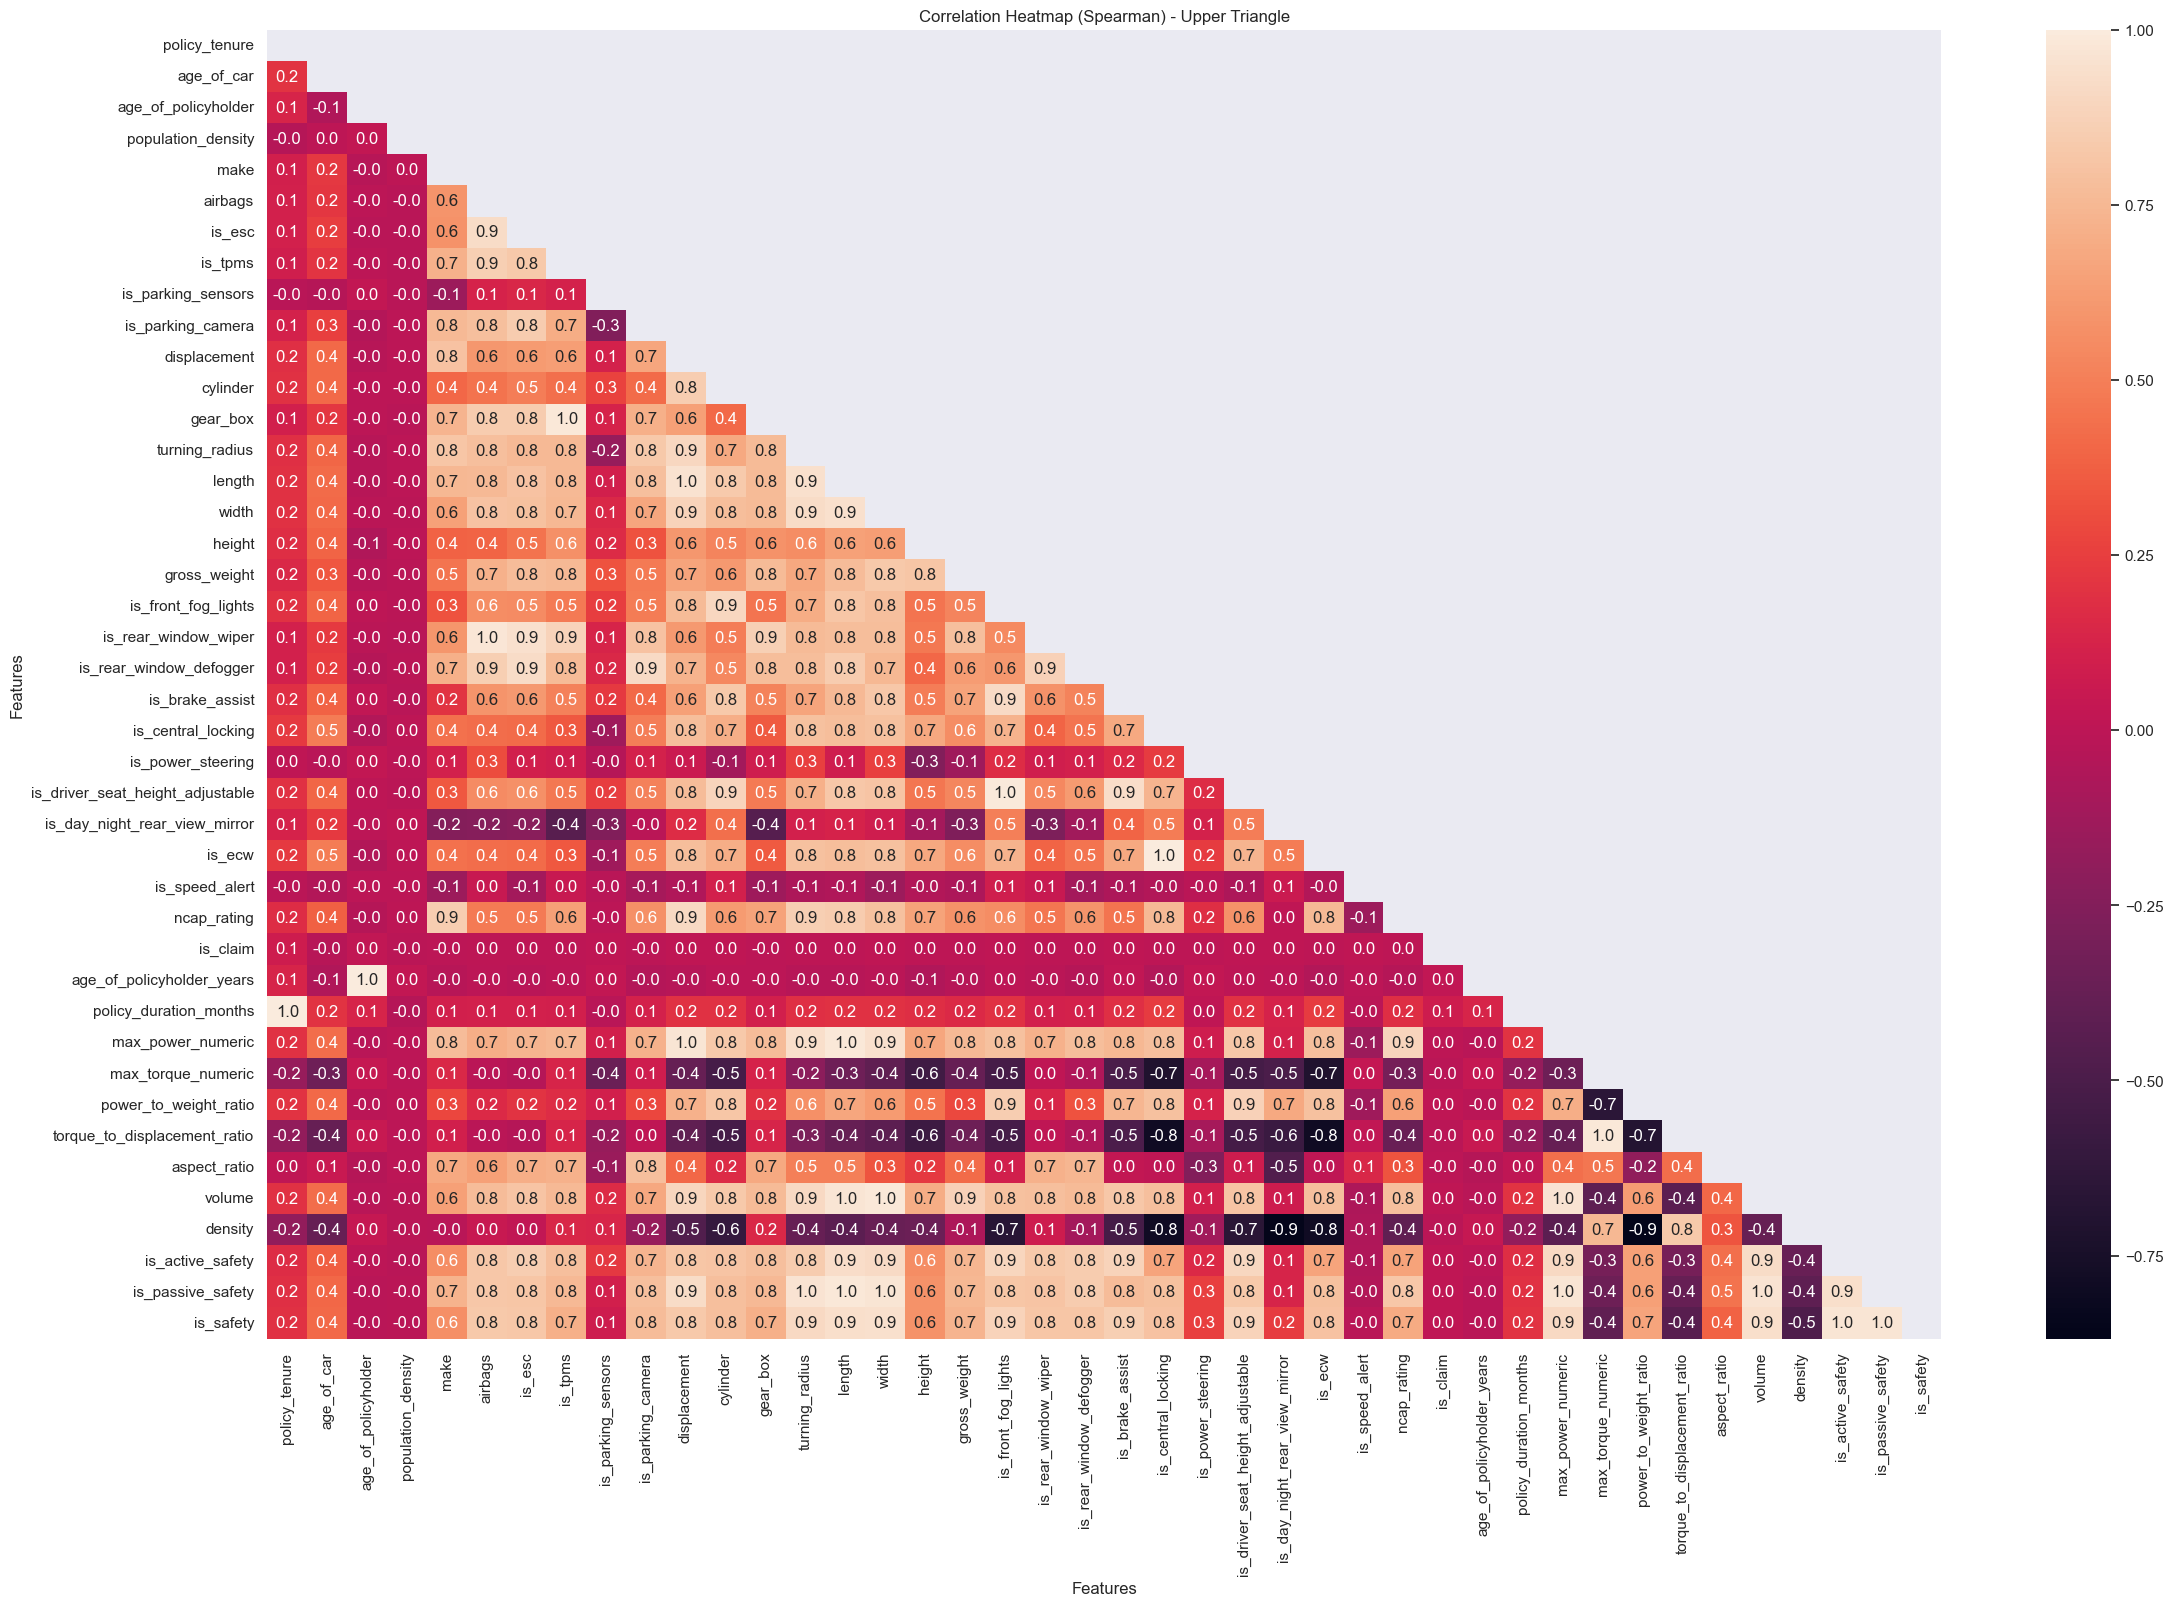

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(27, 17))

# Generate a correlation matrix using Spearman correlation
corr_matrix = df_EDA.corr(method="spearman")

# Create a mask to display only the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with the upper triangle masked
sns.heatmap(corr_matrix, annot=True, fmt='.1f', mask=mask)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap (Spearman) - Upper Triangle')

# Show the plot
plt.show()


In [34]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table of car safety and claim frequency
contingency_table = pd.crosstab(df_EDA['is_safety'], df_EDA['is_claim'])

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square test statistic:", chi2)
print("p-value:", p_value)


Chi-square test statistic: 10.554123689910757
p-value: 0.10317363032081178


# Data modeling

In [35]:
df_model=df_EDA.copy()

In [36]:
df_model.drop(['policy_tenure','age_of_car','age_of_policyholder',
         'fuel_type','max_torque', 'max_power','displacement',
        'gross_weight','length','width','height','max_power_numeric', 
         'max_torque_numeric','is_new_car', 'age_of_policyholder_years'
    , 'is_adjustable_steering', 'is_parking_sensors',
        'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist','is_esc','is_front_fog_lights','is_power_door_locks',
       'is_central_locking', 'is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror',
        'is_ecw', 'is_speed_alert','ncap_rating','make' ,'gear_box','airbags','cylinder','is_active_safety','is_passive_safety', 'displacement', 'density', 'volume', 'turning_radius','is_tpms','is_parking_camera',], inplace=True, axis=1)

In [37]:
df1.shape,df_EDA.shape,df_model.shape

((58592, 44), (58592, 60), (58592, 18))

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'population_density'),
  Text(0, 1.5, 'is_claim'),
  Text(0, 2.5, 'policy_duration_months'),
  Text(0, 3.5, 'power_to_weight_ratio'),
  Text(0, 4.5, 'torque_to_displacement_ratio'),
  Text(0, 5.5, 'aspect_ratio'),
  Text(0, 6.5, 'is_safety')])

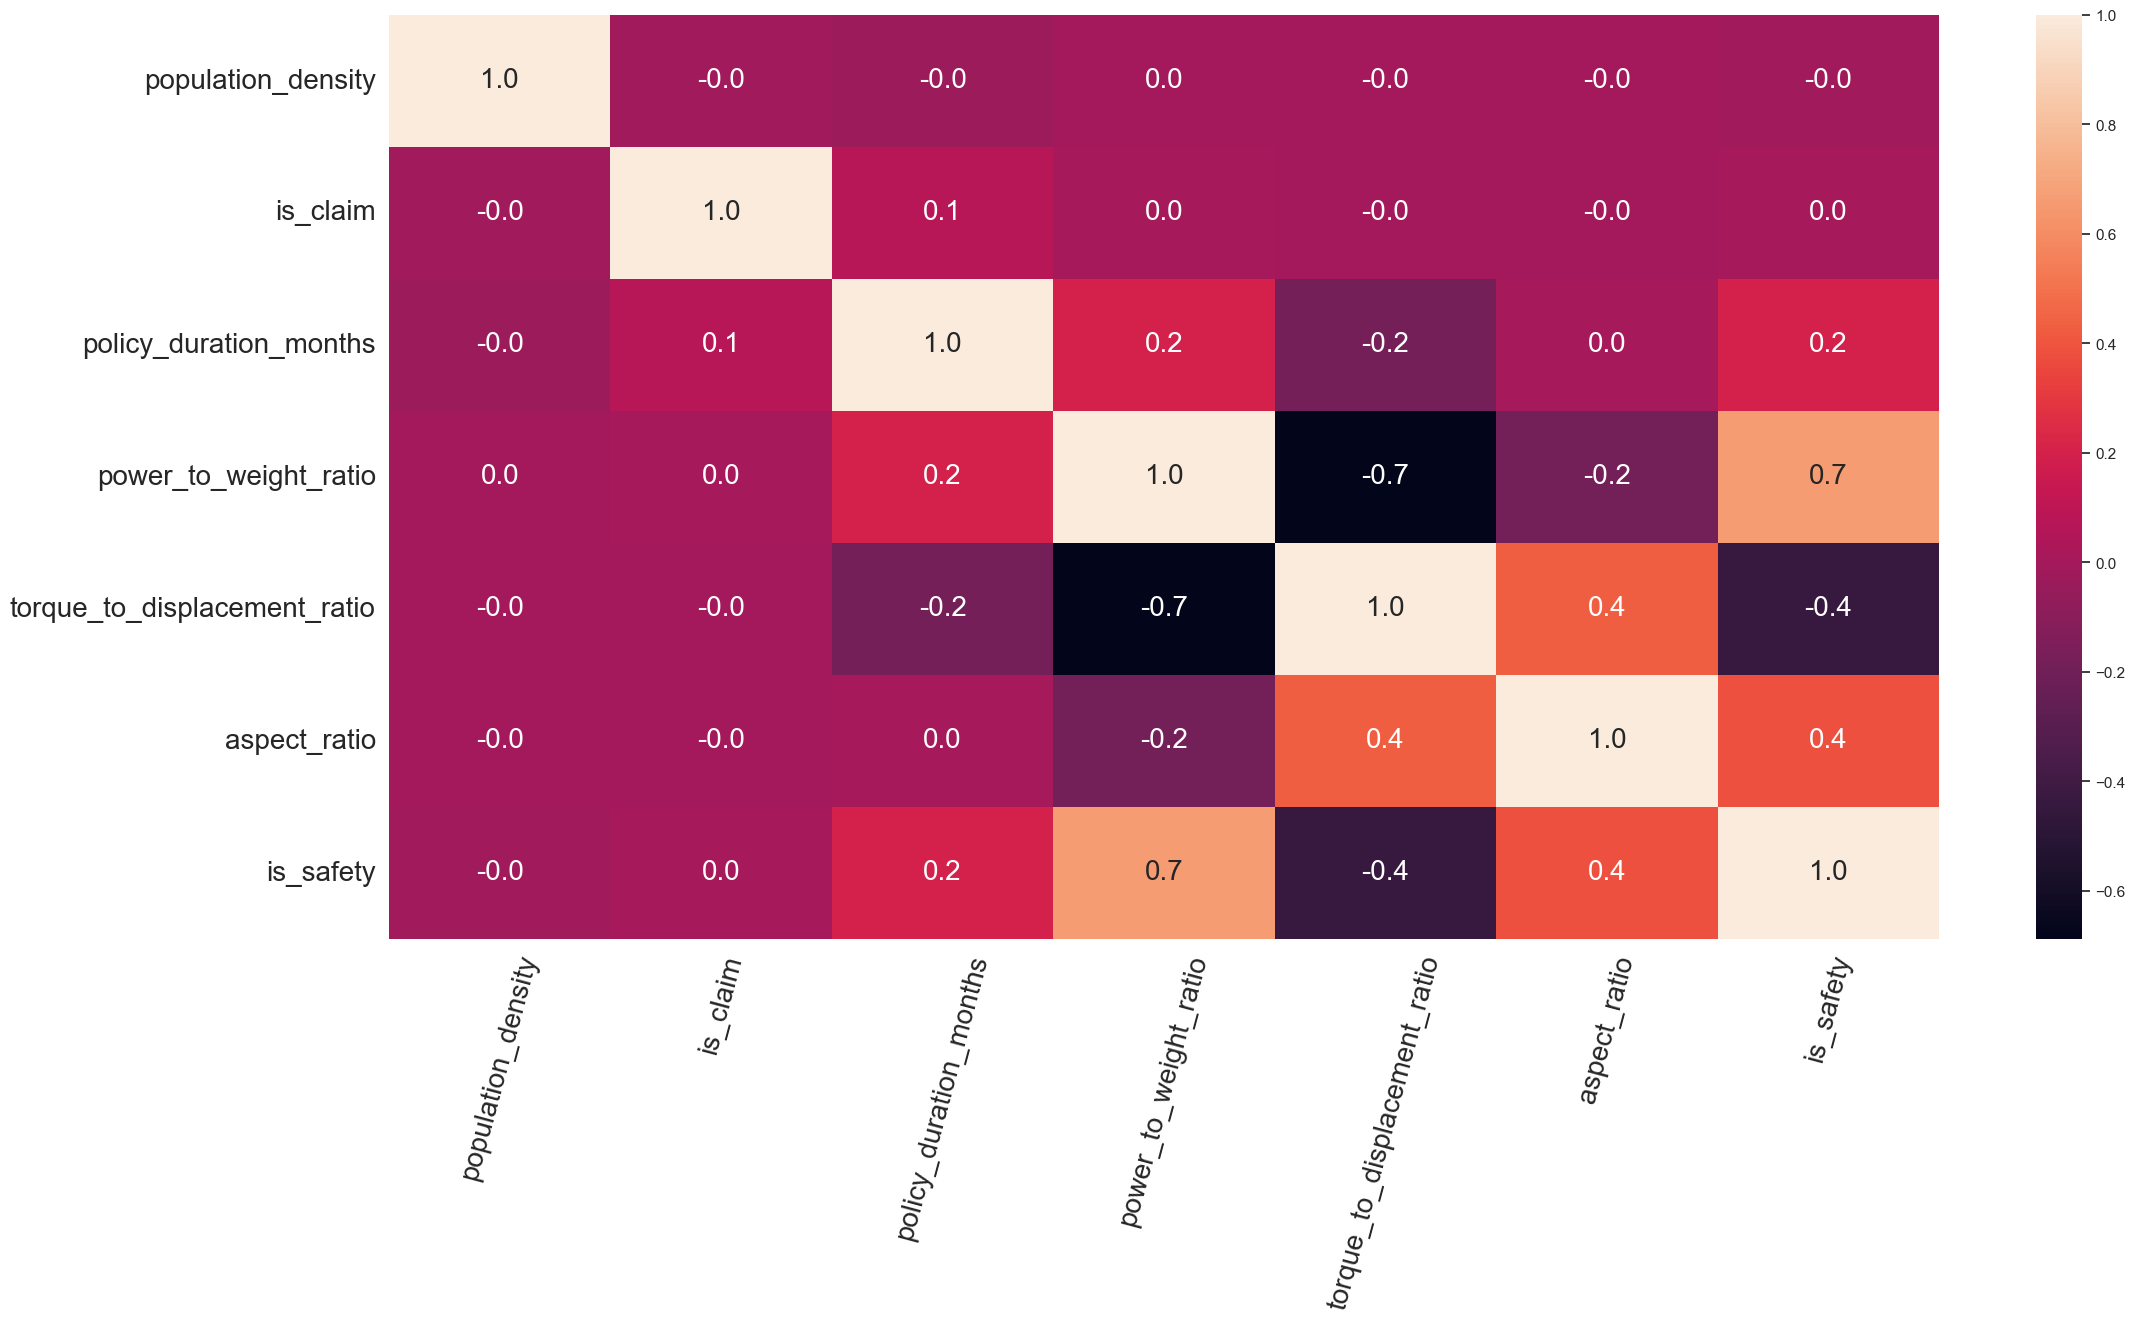

In [38]:
plt.figure(figsize=(25,12))
sns.heatmap(df_model.corr(method="spearman"), annot=True,fmt='.1f',annot_kws={"fontsize": 20})
plt.xticks(fontsize=20,rotation=75)
plt.yticks(fontsize=20)


In [39]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 58591
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   policy_id                     58592 non-null  object  
 1   area_cluster                  58592 non-null  object  
 2   population_density            58592 non-null  float64 
 3   segment                       58592 non-null  object  
 4   model                         58592 non-null  object  
 5   engine_type                   58592 non-null  object  
 6   rear_brakes_type              58592 non-null  object  
 7   transmission_type             58592 non-null  object  
 8   steering_type                 58592 non-null  object  
 9   is_claim                      58592 non-null  int64   
 10  age_group                     58592 non-null  category
 11  car_age_group                 58592 non-null  category
 12  policy_duration_months        58592 non-null  

In [40]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 58591
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   policy_id                     58592 non-null  object  
 1   area_cluster                  58592 non-null  object  
 2   population_density            58592 non-null  float64 
 3   segment                       58592 non-null  object  
 4   model                         58592 non-null  object  
 5   engine_type                   58592 non-null  object  
 6   rear_brakes_type              58592 non-null  object  
 7   transmission_type             58592 non-null  object  
 8   steering_type                 58592 non-null  object  
 9   is_claim                      58592 non-null  int64   
 10  age_group                     58592 non-null  category
 11  car_age_group                 58592 non-null  category
 12  policy_duration_months        58592 non-null  

# Data_modeling

In [41]:
def modeling (data):
    
    label=preprocessing.LabelEncoder()
    data["model"]=label.fit_transform(data["model"])
    data["segment"]=label.fit_transform(data["segment"])
    data["population_density"]=label.fit_transform(data["population_density"])
    data["area_cluster"]=label.fit_transform(data["area_cluster"])
    data["policy_id"]=label.fit_transform(data["policy_id"])
    data["engine_type"]=label.fit_transform(data['engine_type'])
    data=pd.get_dummies(data,columns=['engine_category','car_age_group','age_group'
                                     ,'steering_type', 'rear_brakes_type'  ,'transmission_type'], drop_first=True)
    return data
    


In [42]:
df_train=modeling(df_model)

X=df_train.drop('is_claim', axis=1)
y=df_train['is_claim']

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 58591
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   policy_id                     58592 non-null  int32  
 1   area_cluster                  58592 non-null  int32  
 2   population_density            58592 non-null  int64  
 3   segment                       58592 non-null  int32  
 4   model                         58592 non-null  int32  
 5   engine_type                   58592 non-null  int32  
 6   is_claim                      58592 non-null  int64  
 7   policy_duration_months        58592 non-null  int32  
 8   power_to_weight_ratio         58592 non-null  float64
 9   torque_to_displacement_ratio  58592 non-null  float64
 10  aspect_ratio                  58592 non-null  float64
 11  is_safety                     58592 non-null  int64  
 12  engine_category_Medium        58592 non-null  uint8  
 13  e

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)


In [45]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
    

array([[ 0.03722786,  0.29301271, -1.42014848, ..., -1.15449527,
         0.5603604 ,  0.73073876],
       [-1.43750819,  1.02772997, -0.37172941, ..., -1.15449527,
         0.5603604 ,  0.73073876],
       [ 0.52212942,  0.29301271, -1.42014848, ...,  0.86617938,
        -1.78456578, -1.36847812],
       ...,
       [-0.31195816, -1.91113907, -1.24541197, ...,  0.86617938,
         0.5603604 ,  0.73073876],
       [ 1.60026792,  0.29301271, -1.42014848, ..., -1.15449527,
         0.5603604 , -1.36847812],
       [ 0.7980646 ,  1.17467342,  0.32721663, ...,  0.86617938,
         0.5603604 ,  0.73073876]])

In [46]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (41014, 24)
y_train shape: (41014,)
X_test shape: (17578, 24)
y_test shape: (17578,)


In [51]:
# data balancing using oversampling

oversampler = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [52]:
X_train_oversampled.shape,y_train_oversampled.shape

((76854, 24), (76854,))

In [56]:
# oversampling
def predict(ml_model):
   
    print('Model is: {}'.format(ml_model))
    model=ml_model()
    
    model.fit(X_train_oversampled, y_train_oversampled)
    print('Training_score: {}'.format(model.score(X_train_oversampled, y_train_oversampled)))
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print('accuracy_score: {}'.format(accuracy))

    precision= precision_score(y_test, predictions)
    print('precision_score:\n{}'.format(precision))

    recall = recall_score(y_test, predictions)
    print('recall:\n{}'.format(recall))
    f1 = f1_score(y_test, predictions)
    print('f1_score:\n{}'.format(f1))
    roc_auc = roc_auc_score(y_test, predictions)
    print('roc_auc_score:\n{}'.format(roc_auc))
    confusion = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:")
    print(confusion)
   
predict(LogisticRegression)
print('----------------------')

predict(DecisionTreeClassifier)
print('----------------------')

predict(RandomForestClassifier)
print('----------------------')

predict(XGBClassifier)
print('----------------------')






Model is: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Training_score: 0.7510084055481823
accuracy_score: 0.7361474570485834
precision_score:
0.0821917808219178
recall:
0.29457364341085274
f1_score:
0.1285231116121759
roc_auc_score:
0.5309744625655105
Confusion Matrix:
[[12598  3819]
 [  819   342]]
----------------------
Model is: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Training_score: 1.0
accuracy_score: 0.8601661167368301
precision_score:
0.0713813615333774
recall:
0.09302325581395349
f1_score:
0.08077786088257292
roc_auc_score:
0.5037206185873689
Confusion Matrix:
[[15012  1405]
 [ 1053   108]]
----------------------
Model is: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Training_score: 0.9999479532620293
accuracy_score: 0.9027193082261918
precision_score:
0.09333333333333334
recall:
0.05426356589147287
f1_score:
0.06862745098039215
roc_auc_score:
0.5084925674983344
Confusion Matrix:
[[15805   612]
 [ 1098    63]]
----------------------
Mo

In [57]:
# Create an instance of StratifiedKFold with the desired number of folds
k = 5  # number of folds
stratified_cv = StratifiedKFold(n_splits=k)

# Define the parameter grid for random search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Create an instance of RandomizedSearchCV with the XGBoost classifier, parameter grid, and stratified folds
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=10,  # number of parameter settings that are sampled
    scoring='accuracy',
    cv=stratified_cv.split(X_train_oversampled, y_train_oversampled),
    verbose=1,
    random_state=42,
    n_jobs=-1  # use all available CPU cores
)

# Perform random search cross-validation
random_search.fit(X_train_oversampled, y_train_oversampled)

# Print the best parameter setting and corresponding score
print("Best Parameter Setting: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameter Setting:  {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}
Best Score:  0.9439721150615823


In [ ]:
def create_model(best_params):
    # Instantiate the XGBoost classifier with the best parameters
    model = xgb.XGBClassifier(**best_params)
    return model

# Set the best parameters
best_params = {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1,
               'gamma': 0, 'colsample_bytree': 0.9}

# Create the model using the best parameters
model = create_model(best_params)

# Fit the model to your training data
model.fit(X_train_oversampled, y_train_oversampled)

# Calculate feature importance
importance = model.feature_importances_

# Get feature names
feature_names = X_train_oversampled.columns.tolist()

# Sort feature importance in descending order
sorted_importance = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)

# Extract feature names and importance scores
sorted_feature_names, sorted_importance = zip(*sorted_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, tick_label=sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

# Make predictions
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print('accuracy_score: {}'.format(accuracy))
precision = precision_score(y_test, predictions)
print('precision_score: {}'.format(precision))
recall = recall_score(y_test, predictions)
print('recall: {}'.format(recall))
f1 = f1_score(y_test, predictions)
print('f1_score: {}'.format(f1))
roc_auc = roc_auc_score(y_test, predictions)
print('roc_auc_score: {}'.format(roc_auc))
confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)


In [58]:
#LightGBM classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Create the LightGBM classifier
model = lgb.LGBMClassifier()

# Fit the model to the training data
model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)

# Print the evaluation metrics
print("trainig_score: {}".format(model.score(X_train_oversampled, y_train_oversampled)))
print("Accuracy_score: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1 Score: {}".format(f1))
print("ROC AUC Score: {}".format(roc_auc))
print("Confusion Matrix:")
print(confusion)


trainig_score: 0.9468602805319176
Accuracy_score: 0.9243372397314825
Precision: 0.09178743961352658
Recall: 0.01636520241171404
F1 Score: 0.02777777777777778
ROC AUC Score: 0.5024568291403152
Confusion Matrix:
[[16229   188]
 [ 1142    19]]


In [59]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
import lightgbm as lgb
import numpy as np

# Define the parameter distributions
param_dist = {
    'num_leaves': np.arange(10, 100),
    'max_depth': np.arange(3, 10),
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5],
    'min_child_samples': np.arange(5, 50)
}

# Create the LightGBM classifier
model = lgb.LGBMClassifier()

# Define the stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform random search with stratified cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=cv, scoring='accuracy')
random_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.0, 'num_leaves': 86, 'min_child_samples': 26, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Score: 0.9470814947090244


In [60]:
def create_model(best_params):

    model = lgb.LGBMClassifier(**best_params)
    return model

# Set the best parameters
best_params =  {'subsample': 1.0, 'reg_lambda': 0.0, 'reg_alpha': 0.1, 'num_leaves': 71, 
                'min_child_samples': 7, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

# Create the model using the best parameters
model = create_model(best_params)

# Fit the model to your training data
model.fit(X_train_oversampled, y_train_oversampled)
print('Training_score: {}'.format(model.score(X_train_oversampled, y_train_oversampled)))
# Make predictions
predictions = model.predict(X_test)
  

accuracy = accuracy_score(y_test, predictions)
print('accuracy_score: {}'.format(accuracy))
precision= precision_score(y_test, predictions)
print('precision_score:\n{}'.format(precision))
recall = recall_score(y_test, predictions)
print('recall:\n{}'.format(recall))
f1 = f1_score(y_test, predictions)
print('f1_score:\n{}'.format(f1))
roc_auc = roc_auc_score(y_test, predictions)
print('roc_auc_score:\n{}'.format(roc_auc))
confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

Training_score: 0.9388711062534155
accuracy_score: 0.9177949709864603
precision_score:
0.10773480662983426
recall:
0.03359173126614987
f1_score:
0.05121470781352594
roc_auc_score:
0.5069585019247238
Confusion Matrix:
[[16094   323]
 [ 1122    39]]
